<a href="https://colab.research.google.com/github/DiagoBrando/PyTorch-study_ZTM/blob/main/00pytorch_fundationals_video_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Fundamentals

In [ ]:
## 00.pytorch Fundamentals.
##resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/


# A pytorch workflow

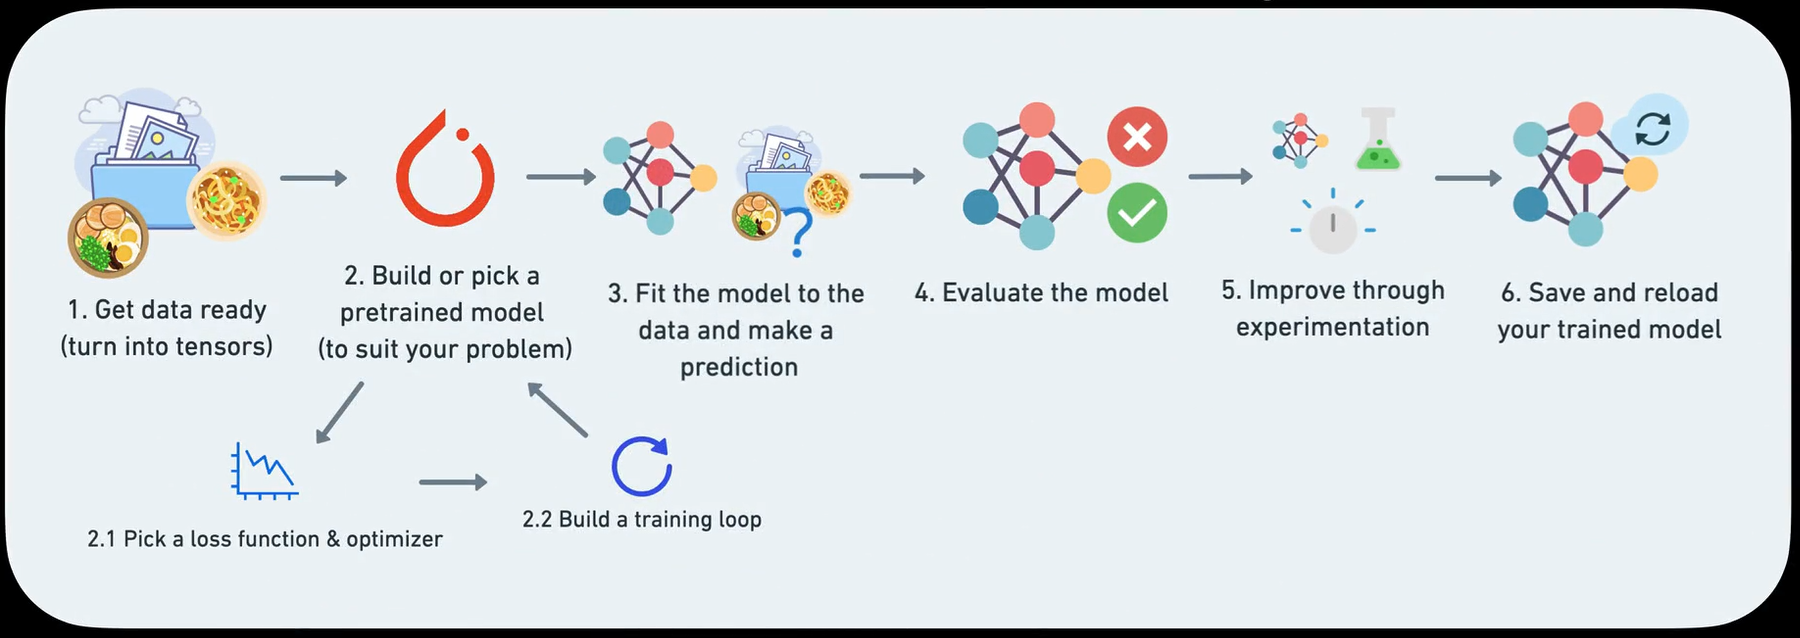

# Data types

## concept for tensors


Concept of torch.Tensor
1.   dimensions (attribute)

        `.ndim`  --> output: a single number `#`
2.   shape (attribute)

        `.shape`  --> output: `torch.Size[#]`


3.   data type

        `.dtype`  --> output: `torch.float32`, or `...`










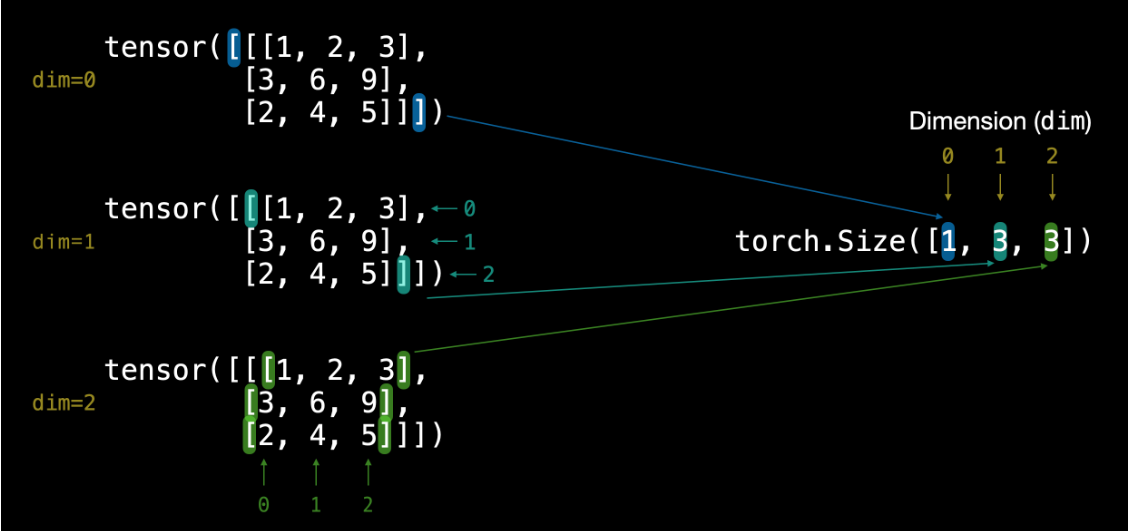

## different tensor types in pytorch

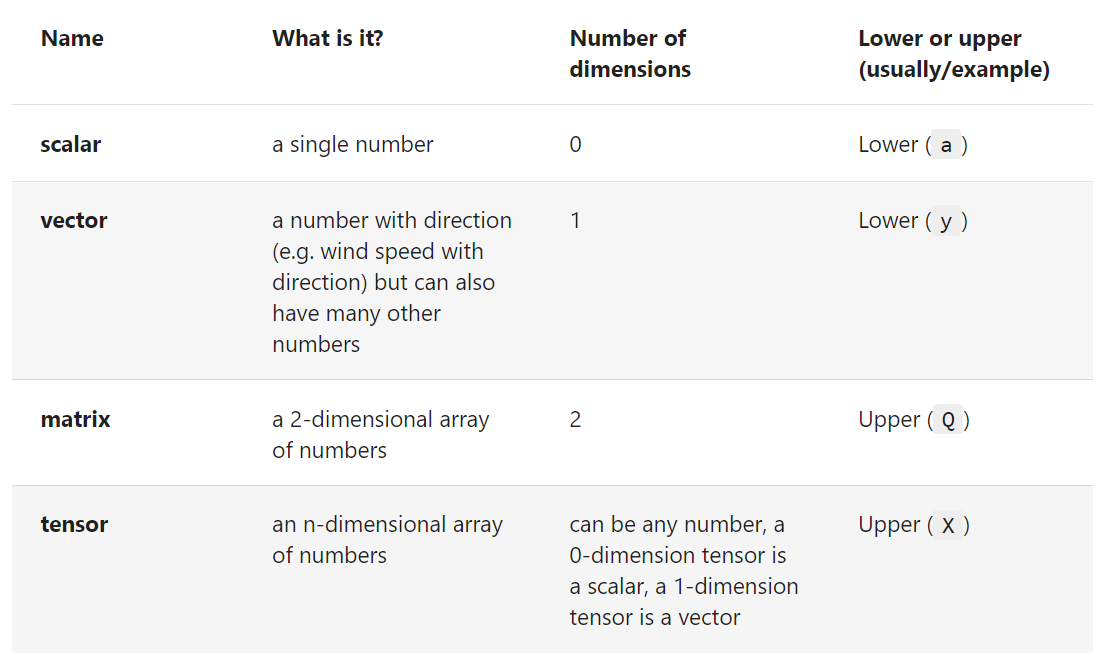

# Fundamental method


Initial way working with pytorch for ML:
`start with random numbers --> look at data --> updata random numbers --> look at data --> update random numbers ..`


```
torch.rand()
  random_tensor = torch.rand(size = (3,4))
```


```
torch.zeros()
  zero = torch.zeros(size = (3,4))
```


```
torch.ones()
  ones = torch.ones(size = (3,4))
```



```
torch.arange(start, end, step)
  zero_to_ten = torch.arrange(start = 0, end = 10, step = 1)
```






# Tensor data type

###Commone errors' reason:
1. different shape of tensor
2. different datatype
3. different device that the tensor stored on

###differetn datatype:
  https://pytorch.org/docs/stable/tensors.html#torch.Tensor


different datatype refer to **precision in computing**.
The higher, the more accurate, the more time to compute.

### check the datatype of tensors

In [ ]:
import torch

In [ ]:
#default datatype for tensor is float32
float_32_tensor = torch.tensor([3,6,9],
                               dtype=None,
                               device=None,
                               requires_grad=False)
float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.int64, device(type='cpu'))

## control the "dtype" of tensor

In [ ]:
#way to create data with different data type
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.5375, 0.0328, 0.0494, 0.1922],
        [0.6802, 0.8868, 0.4009, 0.0686],
        [0.6981, 0.7890, 0.8614, 0.9088]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


Note: When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "***what, what, where***":


### below is how to change the device that the tensor stored on

In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4,device='cuda')    #and store it in GPU

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.7011, 0.8336, 0.5414, 0.8948],
        [0.7296, 0.4157, 0.3237, 0.6429],
        [0.4723, 0.1085, 0.5205, 0.5652]], device='cuda:0')
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cuda:0


#  calculation


1. Element-wise multiplication
```
tensor = torch.tensor([1, 2, 3])
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)
```
2. Matrix multiplication
```
tensor.matmul(tensor, tensor)
tensor @ tensor

```





In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

# Attention.
**No matter what calculation did on a tensor, the tensor's value will not change unless reassigment**

In [ ]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [ ]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [ ]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

In [ ]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [ ]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

In [ ]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


# Attention
***Pay attention to the "element-wise multiplication" and "Matrix multiplication"***

Element- wise multiplication:

```
tensor*tensor
```
Matrix multiplication


```
tensor.matmul(tensor1,tensor2)
```
Above means tensor1 and tensor2 do matrix multiplication, which can be also euqals to


```
tensor @ tensor
```





In [ ]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [ ]:
# Matrix multiplication
#trying to use this command, save time
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

# Find the min, max, mean, sum, etc (aggregation)

In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

using command below:

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


another way to do that

In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

# find the positional min/max.
just find the index of a tensor where the min / max's location in a tensor.

You can also find the index of a tensor where the max or minimum occurs with `torch.argmax()` and `torch.argmin()` respectively.

This is helpful incase you just want the position where the highest (or lowest) value is and not the actual value itself (we'll see this in a later section when using the softmax activation function).


In [ ]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


# change the tensor datatype



```
tensor = torch.arange(10., 100., 10.)

tensor_float16 = tensor.type(torch.float16)
```



In [ ]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [ ]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [ ]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

#linear



```
torch.nn.linear
```



In [ ]:
import torch

tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=9) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[ 1.3843,  1.3137, -0.1953,  0.4034, -0.7014,  1.3484,  0.1558, -0.1847,
          0.5545],
        [ 3.6393,  2.2815, -0.2198,  0.5454, -0.4922,  2.8423,  1.3921,  0.2975,
          1.8537],
        [ 5.8944,  3.2493, -0.2443,  0.6874, -0.2830,  4.3362,  2.6285,  0.7798,
          3.1529]], grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 9])


# Reshaping, stacking, squeezing, and unsqueezing

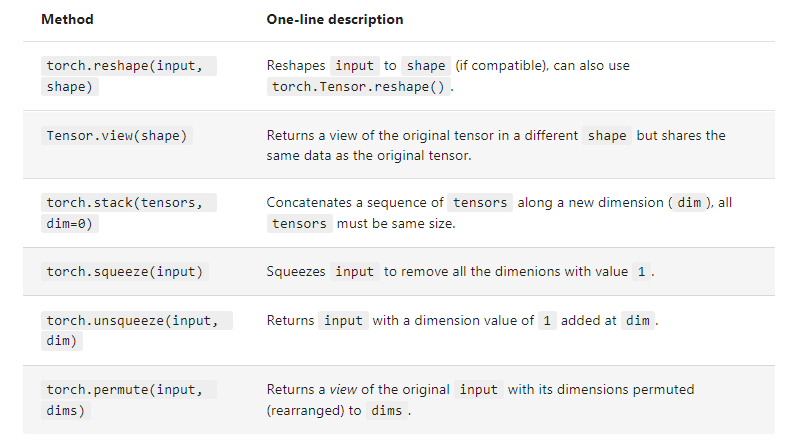

In [ ]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

Now let's add an extra dimension with `torch.reshape().`



In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

We can also change the view with `torch.view()`.




In [ ]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

So changing the view changes the original tensor too.



In [ ]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

**## when dealing with `troch.stack()`, pay attention to the number of` dim`. i.e., `dim=0`, and `dim=1`. They produce different numbers.**



In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=1) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [ ]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 320, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 320, 3])
New shape: torch.Size([3, 224, 320])


# Indexing (selecting data from tensors)
**bold text**select specific data from tensors.


Indexing with PyTorch is similar to indexing with Numpy.

In [ ]:
x=torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
#let's index bracket by bracket
#below is indexing the first dimension
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
#let's index on the middle bracket
#below is indexing the first dimension first, then indexing second dimension
x[0][0]

tensor([1, 2, 3])

In [ ]:
x[0,0]

tensor([1, 2, 3])

In [ ]:
#let's index on the most inner bracket
##below is indexing the first dimension first, then indexing second dimension, then go the last dimension
x[0][2][2]

tensor(9)

You can also use `:` to specify "all values in this dimension" and then use a comma (,) to add another dimension.



In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1,1 ]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

# Pytorch tensors & Numpy

**DIfferences between pytorch and nupmy data type is different**
 \\
default datatype of numpy data: `float64` \\
default datatype of pytroch data: `float32` \\
From NumPy array to Pytorch tensor: `troch.from_numpy()` \\
From Pytorch tensor --> NumPy array: `torch.Tensor.numpy()`




In [ ]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

# Reproducbility (trying to take random out of random)

to reduce the randomness (seed). Flavour of randomness.

In [ ]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

# running tensors on GPUs (and making faster computation)

In [ ]:
# Check for GPU
import torch
torch.cuda.is_available()

True

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Count number of devices
torch.cuda.device_count()

1

# putting tensors on and off the GPU

In [ ]:
#putting tensors or models on the GPU for faster computing.
#create a tensor (default on the cpu)
tensor = torch.tensor([1,2,3])

#tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
#move tensor to GPU ( if available )
tensor_on_gpu=tensor.to(device)

tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### moving tensors to CPU

**If tensor is on GPU, can't transform it to NumPy (this will error)**


In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.


Instead, to get a tensor back to CPU and usable with NumPy we can use` Tensor.cpu()`.

This copies the tensor to CPU memory so it's usable with CPUs.

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [ ]:
!nvidia-smi

Fri Jan 19 05:50:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              40W / 300W |    310MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# exercise